In [21]:
from matplotlib import pyplot as plt

import time

from gym import Env
from gym.spaces import Box, Discrete

import numpy as np

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import base64
from selenium.webdriver.common.by import By
import numpy as np
from matplotlib.image import imread
from io import BytesIO

In [32]:
class ImagineDungeonsEnv(Env):
    # setup the environment action and observation shapes
    def __init__(self):
        super().__init__()
        
        # setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1, 160, 240), dtype=np.uint8)
        # height: 640px; / 4
        # width: 960px; / 4
        self.action_space = Discrete(8)

        self.game_url = "https://imagine-dungeons.vercel.app/games/play/63e0cb92194f58ee8c80fdbc"

        self.options = Options()
        self.options.add_experimental_option("detach", True)

        self.driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                                options=self.options)

        self.driver.get(self.game_url)

    # what is called to do something in the game
    def step(self, action):
        # Action key
        # 0 - TOGGLE RUN/WALK (shift), 1 - MOVE (w), 2 - ROTATE LEFT (a), 3 - ROTATE RIGHT (d)
        # 4 - MOVE AND ROTATE LEFT (w + a), 5 -  MOVE AND ROTATE RIGHT (w + d)
        # 6 - ATTACK (space), 7 - INTERACT (e), 8 - IDLE (none)
        pass
    
    # visualize the game
    def render(self):
        pass
    # restart the game
    def reset(self):
        pass
    # closes down observation
    def close(self):
        pass
    # 
    def get_observation(self):
        # get the canvas element
        canvas = self.driver.find_element(By.ID, "editCanvas")

        # decode the base64 encoded PNG
        canvas_png = canvas.screenshot_as_png

        raw = np.array(imread(BytesIO(canvas_png)))[:,:,:3].astype(np.uint8)

        return raw

    def get_done(self):
        pass

In [33]:
env = ImagineDungeonsEnv()

In [34]:
env.get_observation()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

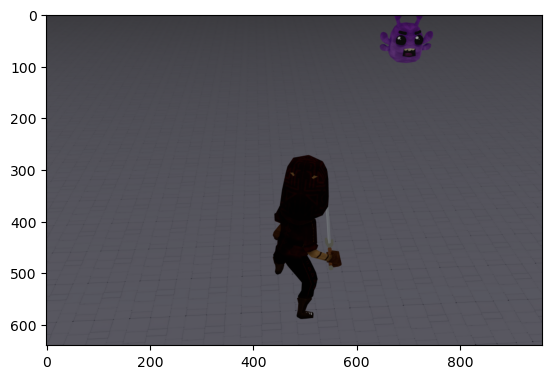

In [27]:
plt.imshow(env.get_observation())

In [12]:
env.action_space.sample()

5

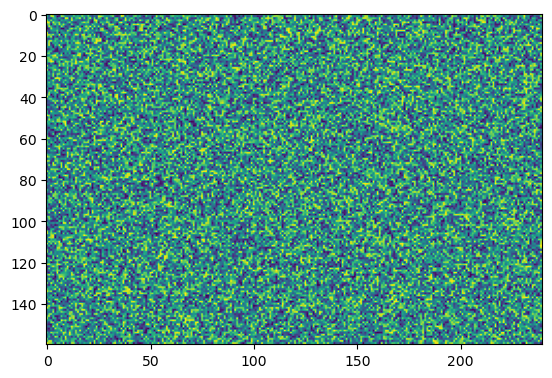

In [15]:
plt.imshow(env.observation_space.sample()[0])